### 衡量回归算法的标准

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

### 波士顿房产数据

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
x = housing.data[:, 5] # 只使用房间数这个特征

In [6]:
x.shape

(20640,)

In [7]:
y = housing.target

In [8]:
y.shape

(20640,)

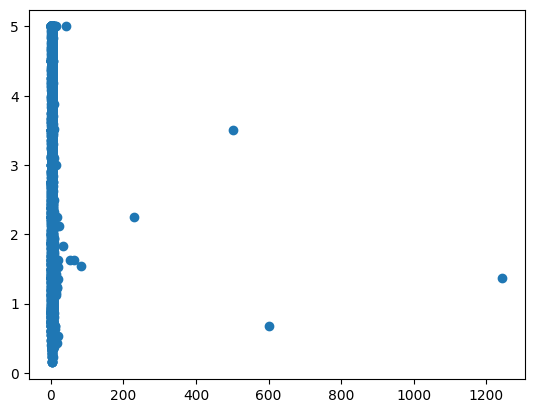

In [9]:
plt.scatter(x, y)

In [10]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [11]:
x = data[:, 5] # 只使用房间数这个特征

In [12]:
x.shape

(506,)

In [13]:
y = target

In [14]:
y.shape

(506,)

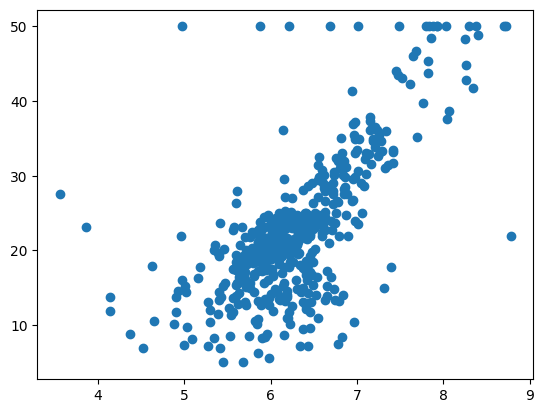

In [15]:
plt.scatter(x, y)

In [16]:
np.max(y)

50.0

In [17]:
x = x[y < 50.0]
y = y[y < 50.0]

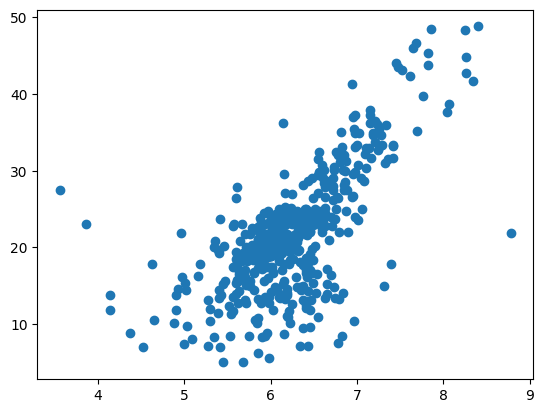

In [18]:
plt.scatter(x, y)

### 使用简单线性回归法

In [19]:
from model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [20]:
x_train.shape

(392,)

x_test.shape

In [21]:
from SimpleLinearRegression import SimpleLinearRegression2

In [22]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression2()

In [23]:
reg.a_

7.8608543562689555

In [24]:
reg.b_

-27.459342806705543

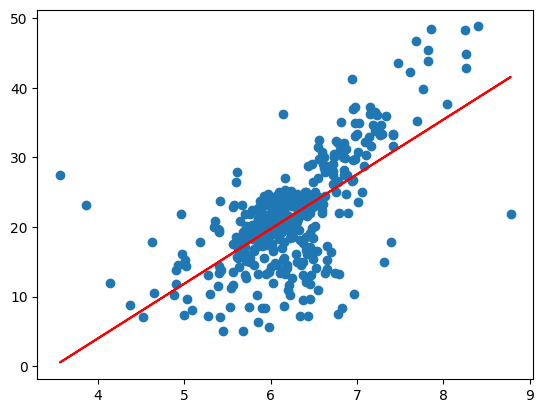

In [25]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')

In [26]:
y_predict = reg.predict(x_test)

### MSE

In [27]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
mse_test

24.156602134387438

### RMSE

In [28]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

## MAE

In [29]:
mse_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mse_test

3.5430974409463873

In [30]:
from metrics import mean_squared_error
from metrics import root_mean_squared_error
from metrics import mean_absolute_error

In [31]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [32]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [33]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### scikit-learn中的MSE和MAE

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [35]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [36]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### R Square

In [37]:
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.6129316803937322

In [38]:
from metrics import r2_score

In [39]:
r2_score(y_test, y_predict)

0.6129316803937322

In [40]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.6129316803937324

In [41]:
reg.score(x_test, y_test)

0.6129316803937322